<a href="https://colab.research.google.com/github/AlexKressner/Statistik/blob/main/Deskriptive_Statistik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np

In [2]:
# Repository von github klonen, damit die Daten verfügbar sind
! git clone https://github.com/AlexKressner/Statistik

Cloning into 'Statistik'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 23 (delta 4), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (23/23), 171.35 KiB | 1.12 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [3]:
pd.options.display.max_columns = 100

# Kaggle Competition **House Price Prediction**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

## 1. Kennzahlen für diskrete Merkmale

In [4]:
# Daten laden
data = pd.read_csv("./Statistik/house_price.csv")

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.YrSold

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

In [7]:
data.YrSold = data.YrSold.astype("object")

**AUFGABE:** Bitte berechnen Sie die absolute Häufigkeit des Merkmals "YrSold"! Nutzen Sie dafür die `pandas` Funktion `value_counts()`!

**AUFGABE:** Bitte stellen Sie die absoluten Häufigkeite in einem Säulendiagramm dar! Nutzen Sie dafür die Funktion `plot()`.



**AUFGABE:** Bitte berechnen Sie die relativen Häufigkeit des Merkmals "YrSold"! Passen Sie dafür die Parameter der Funktion zur Berechnung der absoluten Häufigkeit an!

**AUFGABE:** Bitte stellen Sie die relativen Häufigkeite in einem Kuchendiagramm dar!

**Aufgabe:** Bitte berechnen Sie die empirische Verteilungsfunktion für das Merkmal "YrSold".

## 2. Kennzahlen für stetige Merkmale

**AUFGABE:** Bitte berechnen Sie das arithmetische Mittel für den Verkaufspreis, d.h. die Spalte `SalePrice`!

**AUFGABE:** Bitte berechnen Sie den Median für den Verkaufspreis, d.h. die Spalte `SalePrice`!

**AUFGABE:** Bitte berechnen Sie den Modus für den Verkaufspreis, d.h. die Spalte `SalePrice`!

**AUFGABE:** Erstellen Sie ein Histogramm für das Merkmal `SalePrice`! Nutzen Sie dafür die Funktion `plot`. Wie viele Klassen werden gebildet? Bitte verändern Sie die Einstellungen, damit 20 äquidistante Klassen gebildet werden!

**AUFGABE:** Erstellen Sie eine Abbildung, die empirische Verteilungsfunktion für das Merkmal `SalePrice` zeigt! Nutzen Sie dafür die Funktionen `np.arange()`, und `plot()`.

**AUFGABE:** Bitte berechnen Sie die Standardabweichung, Varianz und den Variationskoeffizienten für das Merkmal `SalePrice`!

**AUFGABE:** Weisen Sie für das Merkmal `SalePrice` nach, dass beide Formel für die empirische Varianz nach dem Varianzverschiebungssatz in gleichen Werten resultieren!

## 3. Kontingenz- und Korrelationsanalyse

**AUFGABE:** Bitte erstellen Sie eine Kreuztabelle für die Merkmale `Fireplaces` und `TotRmsAbvGrd`! Die Kreuztabelle soll die absoluten Häufigkeiten wiederspiegeln.

In [10]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd)

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,1,12,77,184,218,111,58,12,10,3,3,1,690
1,0,5,15,77,158,187,115,53,27,9,4,0,650
2,0,0,5,14,26,29,13,9,10,6,3,0,115
3,0,0,0,0,0,2,1,1,0,0,1,0,5
All,1,17,97,275,402,329,187,75,47,18,11,1,1460


**AUFGABE:** Bitte ergänzen Sie jeweils die Randhäufigkeiten zur Kreuztabelle.

In [11]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd, margins=True)

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,1,12,77,184,218,111,58,12,10,3,3,1,690
1,0,5,15,77,158,187,115,53,27,9,4,0,650
2,0,0,5,14,26,29,13,9,10,6,3,0,115
3,0,0,0,0,0,2,1,1,0,0,1,0,5
All,1,17,97,275,402,329,187,75,47,18,11,1,1460


**AUFGABE:** Bitte stellen Sie nun die relativen Häufigkeiten in der Kreuztabelle dar.

In [14]:
pd.crosstab(data.Fireplaces, data.TotRmsAbvGrd, margins=True, normalize=True).round(2)*100

TotRmsAbvGrd,2,3,4,5,6,7,8,9,10,11,12,14,All
Fireplaces,,,,,,,,,,,,,
0,0.0,1.0,5.0,13.0,15.0,8.0,4.0,1.0,1.0,0.0,0.0,0.0,47.0
1,0.0,0.0,1.0,5.0,11.0,13.0,8.0,4.0,2.0,1.0,0.0,0.0,45.0
2,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
All,0.0,1.0,7.0,19.0,28.0,23.0,13.0,5.0,3.0,1.0,1.0,0.0,100.0


**AUFGABE:** Bitte erstellen Sie eine Pivottabelle, die für jede Kombination von Verkaufsjahr (`YrSold`) und Qualitätsindex einer Immobilie (`OverallQual`) den mittleren Verkaufspreis (`SalePrice`) wiedergibt.

In [20]:
pd.pivot_table(data, values="SalePrice", index="YrSold", columns="OverallQual", aggfunc=lambda x: x.median().round(), margins=True)

OverallQual,1,2,3,4,5,6,7,8,9,10,All
YrSold,,,,,,,,,,,
2006,NaN,35311.0,93500.0,107000.0,135960.0,156950.0,200050.0,268000.0,360000.0,470000.0,163995.0
2007,39300.0,NaN,99500.0,110000.0,132000.0,168000.0,194800.0,278606.0,319030.0,605750.0,167000.0
2008,NaN,NaN,69750.0,110129.0,130500.0,165500.0,198000.0,274000.0,328900.0,355000.0,164000.0
2009,61000.0,60000.0,88950.0,103950.0,132750.0,161500.0,199250.0,257000.0,335000.0,394556.0,162000.0
2010,NaN,NaN,76500.0,108888.0,132500.0,152000.0,216000.0,253925.0,386466.0,NaN,155000.0
All,50150.0,60000.0,86250.0,108000.0,133000.0,160000.0,200141.0,269750.0,345000.0,432390.0,163000.0


**AUFGABE:** Erstellen Sie einen Scatterplot für die Merkmale `SalePrice` und `GrLivArea`.

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

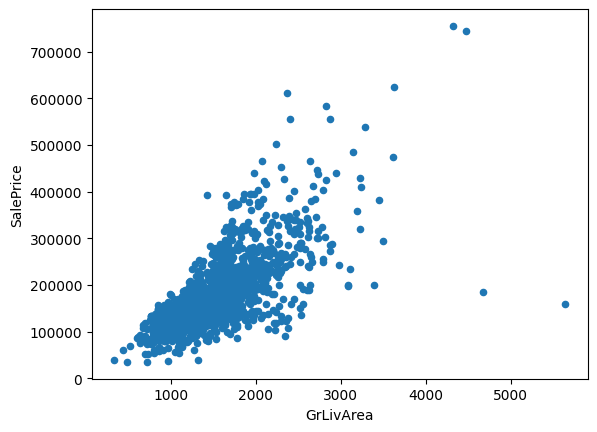

In [22]:
data.plot.scatter(x="GrLivArea",y="SalePrice")

**AUFGABE:** Berechnen Sie den Pearson-Bravais Korrelationskoeffizienten für die Merkmale `SalePrice` und `GrLivArea`.

In [27]:
data[["GrLivArea","SalePrice"]].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


In [28]:
data.corr()

<ipython-input-28-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420


In [26]:
np.corrcoef(data.SalePrice, data.GrLivArea)

array([[1.        , 0.70862448],
       [0.70862448, 1.        ]])

## 4. Regressionsanalyse

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

**AUFGABE:** Bitte bestimmen Sie die Regressionsgerade, die den statistischen Zusammenhang zwischen `SalePrice` und `GrLivArea` bestmöglich beschreibt. Was sind die Parameter ($\hat{a}, \hat{b}$) der Regressionsgeraden?

In [31]:
model = LinearRegression()
X = data[["GrLivArea"]]
y = data.SalePrice
model.fit(X,y)
model.intercept_, model.coef_

(18569.02585648722, array([107.13035897]))

**AUFGABE:** Bitte bestimmen Sie den mittleren absoluten Fehler, den mittleren absoluten prozentualen Fehler sowie das Bestimmtheitsmaß?

In [33]:
y_pred = model.predict(X)
y_pred

array([201761.93968805, 153767.53887136, 209903.84696945, ...,
       269254.06583652, 134055.55282165, 153124.75671756])

In [38]:
mean_absolute_error(y,y_pred), mean_absolute_percentage_error(y,y_pred), r2_score(y, y_pred)

(37638.72898759625, 0.22552425216893301, 0.5021486502718042)

**AUFGABE:** Bitte erstellen Sie einen Scatter Plot für die Merkmale `GrLivArea` und `SalePrice`, in dem die zuvor berechnete Regressionsgerade eingezeichnet ist?

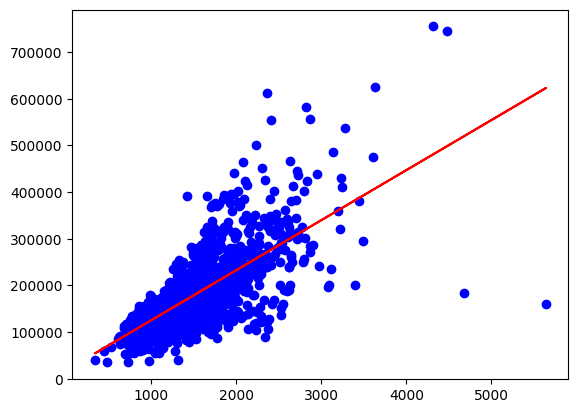

In [43]:
plt.scatter(x=data.GrLivArea, y=data.SalePrice, color="blue")
plt.plot(X, y_pred, color="red")
plt.show()